In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import Dataset from the NEDL google drive
url = 'https://drive.usercontent.google.com/download?id=1floGmqRy7mE8e-F9PKmHWDm_ALGJGu73&export=download&confirm=t&uuid=5a1eceae-e9da-46f2-95eb-c3900511abd2'
df = pd.read_excel(url, sheet_name='Logit')

In [3]:
# Clean dataset
# Remove unnecesary columns and use first row as headers

df.drop(df.index[0:6], inplace=True)
df.reset_index(drop=True, inplace=True)
df.columns = df.iloc[0]

df = df.iloc[1:]
df = df.iloc[0:500]

df.drop('id', axis=1, inplace=True)
df = df.iloc[:,0:16]
df.drop(df.columns[4:11], axis=1, inplace=True)

df.reset_index(drop=True, inplace=True)
df.index.name = 'ID'
df.head()

,Default,Constant,Homeowner,Employed,Income,Expenses,Assets,Debt,Loan amount
ID,,,,,,,,,
0,0,1,0,0,129,73,0,0,800
1,0,1,0,1,131,48,0,0,1000
2,1,1,1,0,200,90,3000,0,2000
3,0,1,0,1,182,63,2500,0,900
4,0,1,0,1,107,46,0,0,310


In [4]:
# Covert variables from object to int
df = df.astype(str).astype(int)
df.dtypes

0
Default        int32
Constant       int32
Homeowner      int32
Employed       int32
Income         int32
Expenses       int32
Assets         int32
Debt           int32
Loan amount    int32
dtype: object

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
y = df['Default']
X = df.drop(['Default'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

#

### We hava to create another fives sets of predicting varables, for a total of six

In [7]:
# Only transformed predicting variables
X1_train = X_train.loc[:]
X1_train['log(E/I)'] = np.log(X1_train['Expenses']/X1_train['Income'])
X1_train['log(D/A)'] = np.log((X1_train['Debt']+X1_train['Loan amount'])/(X1_train['Assets']+X1_train['Loan amount']))
X1_train['log(LA/I)'] = np.log(X1_train['Loan amount']/X1_train['Income'])
# Remove original continous variables
X1_train.drop(['Income', 'Expenses', 'Assets', 'Debt', 'Loan amount'], axis=1, inplace=True)

# Both original and transformed variables
X2_train = X_train.loc[:]
X2_train['log(E/I)'] = np.log(X2_train['Expenses']/X2_train['Income'])
X2_train['log(D/A)'] = np.log((X2_train['Debt']+X2_train['Loan amount'])/(X2_train['Assets']+X2_train['Loan amount']))
X2_train['log(LA/I)'] = np.log(X2_train['Loan amount']/X2_train['Income'])

########################################################################
###################### Test variables ###############################
X1_test = X_test.loc[:]
X1_test['log(E/I)'] = np.log(X1_test['Expenses']/X1_test['Income'])
X1_test['log(D/A)'] = np.log((X1_test['Debt']+X1_test['Loan amount'])/(X1_test['Assets']+X1_test['Loan amount']))
X1_test['log(LA/I)'] = np.log(X1_test['Loan amount']/X1_test['Income'])
# Remove original continous variables
X1_test.drop(['Income', 'Expenses', 'Assets', 'Debt', 'Loan amount'], axis=1, inplace=True)

# Both original and transformed variables
X2_test = X_test.loc[:]
X2_test['log(E/I)'] = np.log(X2_test['Expenses']/X2_test['Income'])
X2_test['log(D/A)'] = np.log((X2_test['Debt']+X2_test['Loan amount'])/(X2_test['Assets']+X2_test['Loan amount']))
X2_test['log(LA/I)'] = np.log(X2_test['Loan amount']/X2_test['Income'])

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
# Three sets of normalized predicting datasets.
scale = StandardScaler()

# Training datasets
x_train = scale.fit(X_train).transform(X_train)
x_train[:,0] = 1

x1_train = scale.fit(X1_train).transform(X1_train)
x1_train[:,0] = 1

x2_train = scale.fit(X2_train).transform(X2_train)
x2_train[:,0] = 1

# Test datasets
x_test = scale.fit(X_test).transform(X_test)
x_test[:,0] = 1

x1_test = scale.fit(X1_test).transform(X1_test)
x1_test[:,0] = 1

x2_test = scale.fit(X2_test).transform(X2_test)
x2_test[:,0] = 1

# 

### Now, we create six models, each corresponding to a different  dataset

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
model0 = LogisticRegression(fit_intercept=False, solver='newton-cholesky', penalty=None)
model0.fit(X_train, y_train)

model1 = LogisticRegression(fit_intercept=False, solver='newton-cholesky', penalty=None)
model1.fit(X1_train, y_train)

model2 = LogisticRegression(fit_intercept=False, solver='newton-cholesky', penalty=None)
model2.fit(X2_train, y_train)

model0n = LogisticRegression(fit_intercept=False, solver='newton-cholesky', penalty=None)
model0n.fit(x_train, y_train)

model1n = LogisticRegression(fit_intercept=False, solver='newton-cholesky', penalty=None)
model1n.fit(x1_train, y_train)

model2n = LogisticRegression(fit_intercept=False, solver='newton-cholesky', penalty=None)
model2n.fit(x2_train, y_train)

print('\n The six models have now been fitted, each with a different dataset of predicting variables')


 The six models have now been fitted, each with a different dataset of predicting variables


In [12]:
# Let's now see how our first results look for model0

print('Predictions of probability, " from zero to 1":', model0.predict_proba(X_test)[0:5,1])
print('Predictions of category, "zero or 1":', model0.predict(X_test)[:5])
print('Accuracy Score for model0:', model0.score(X_test, y_test), '\n')
print('Shape of "X_train" dataset:', X_train.shape) 

Predictions of probability, " from zero to 1": [0.05721853 0.6475865  0.15577878 0.06924078 0.00331434]
Predictions of category, "zero or 1": [0 1 0 0 0]
Accuracy Score for model0: 0.75 

Shape of "X_train" dataset: (400, 8)


 # 

### We're going to create predictions of probability and class for each model. Then we we'll assign them to a variable.

In [13]:
# Predictions of probabiblity
y_hat0 = model0.predict_proba(X_test)[0:,1]
y_hat1 = model1.predict_proba(X1_test)[0:,1]
y_hat2 = model2.predict_proba(X2_test)[0:,1]
y_hat0n = model0n.predict_proba(x_test)[0:,1]
y_hat1n = model1n.predict_proba(x1_test)[0:,1]
y_hat2n = model2n.predict_proba(x2_test)[0:,1]

In [14]:
a1 = model0.score(X_test, y_test)
a2 = model1.score(X1_test, y_test)
a3 = model2.score(X2_test, y_test)
a1n = model0n.score(x_test, y_test)
a2n = model1n.score(x1_test, y_test)
a3n = model2n.score(x2_test, y_test)

### And we summarise our results in a table

In [15]:
### Summarising Table

# Table 0
tbl0 = pd.DataFrame(model0.coef_).T.rename({0: 'Log 1'}, axis=1)
tbl0['Variable'] = ['Constant', 'Homeowner', 'Employed', 'Income','Expenses', 
                    'Assets', 'Debt', 'Loan amount']
tbl0 = tbl0[['Variable', 'Log 1']]
tbl0.set_index('Variable', inplace=True)

#Table 1
tbl1 = pd.DataFrame(model1.coef_).T.rename({0: 'Log 2'}, axis=1)
tbl1['Variable'] = ['Constant', 'Homeowner', 'Employed' ,'log(E/I)', 'log(D/A)', 'log(LA/I)']
tbl1 = tbl1[['Variable', 'Log 2']]
tbl1.set_index('Variable', inplace=True)
tbl1

# Table 2
tbl2 = pd.DataFrame(model2.coef_).T.rename({0: 'Log 3'}, axis=1)
tbl2['Variable'] = ['Constant', 'Homeowner', 'Employed', 'Income','Expenses', 
                    'Assets', 'Debt', 'Loan amount' ,'log(E/I)', 'log(D/A)', 'log(LA/I)']
tbl2 = tbl2[['Variable', 'Log 3']]
tbl2.set_index('Variable', inplace=True)


# Table 0n
tbl0n = pd.DataFrame(model0.coef_).T.rename({0: 'Log 1 (norm)'}, axis=1)
tbl0n['Variable'] = ['Constant', 'Homeowner', 'Employed', 'Income','Expenses', 
                    'Assets', 'Debt', 'Loan amount']
tbl0n = tbl0n[['Variable', 'Log 1 (norm)']]
tbl0n.set_index('Variable', inplace=True)

#Table 1n
tbl1n = pd.DataFrame(model1.coef_).T.rename({0: 'Log 2 (norm)'}, axis=1)
tbl1n['Variable'] = ['Constant', 'Homeowner', 'Employed' ,'log(E/I)', 'log(D/A)', 'log(LA/I)']
tbl1n = tbl1n[['Variable', 'Log 2 (norm)']]
tbl1n.set_index('Variable', inplace=True)

# Table 2n
tbl2n = pd.DataFrame(model2.coef_).T.rename({0: 'Log 3 (norm)'}, axis=1)
tbl2n['Variable'] = ['Constant', 'Homeowner', 'Employed', 'Income','Expenses', 
                    'Assets', 'Debt', 'Loan amount' ,'log(E/I)', 'log(D/A)', 'log(LA/I)']
tbl2n = tbl2n[['Variable', 'Log 3 (norm)']]
tbl2n.set_index('Variable', inplace=True)

# Final Table
tbl = pd.concat([tbl0, tbl1, tbl2,  tbl0n, tbl1n, tbl2n], axis=1)
tbl.replace(np.nan, "", inplace=True)
tbl

,Log 1,Log 2,Log 3,Log 1 (norm),Log 2 (norm),Log 3 (norm)
Variable,,,,,,
Constant,-0.140692,-1.450469,2.425289,-0.140692,-1.450469,2.425289
Homeowner,-1.301106,-0.425834,-0.893803,-1.301106,-0.425834,-0.893803
Employed,-1.155628,-1.25986,-1.216967,-1.155628,-1.25986,-1.216967
Income,-0.01268,,-0.002254,-0.01268,,-0.002254
Expenses,0.007235,,-0.021513,0.007235,,-0.021513
Assets,-0.000081,,-0.000039,-0.000081,,-0.000039
Debt,0.000437,,0.000264,0.000437,,0.000264
Loan amount,0.001767,,0.002061,0.001767,,0.002061
log(E/I),,0.330361,1.878856,,0.330361,1.878856


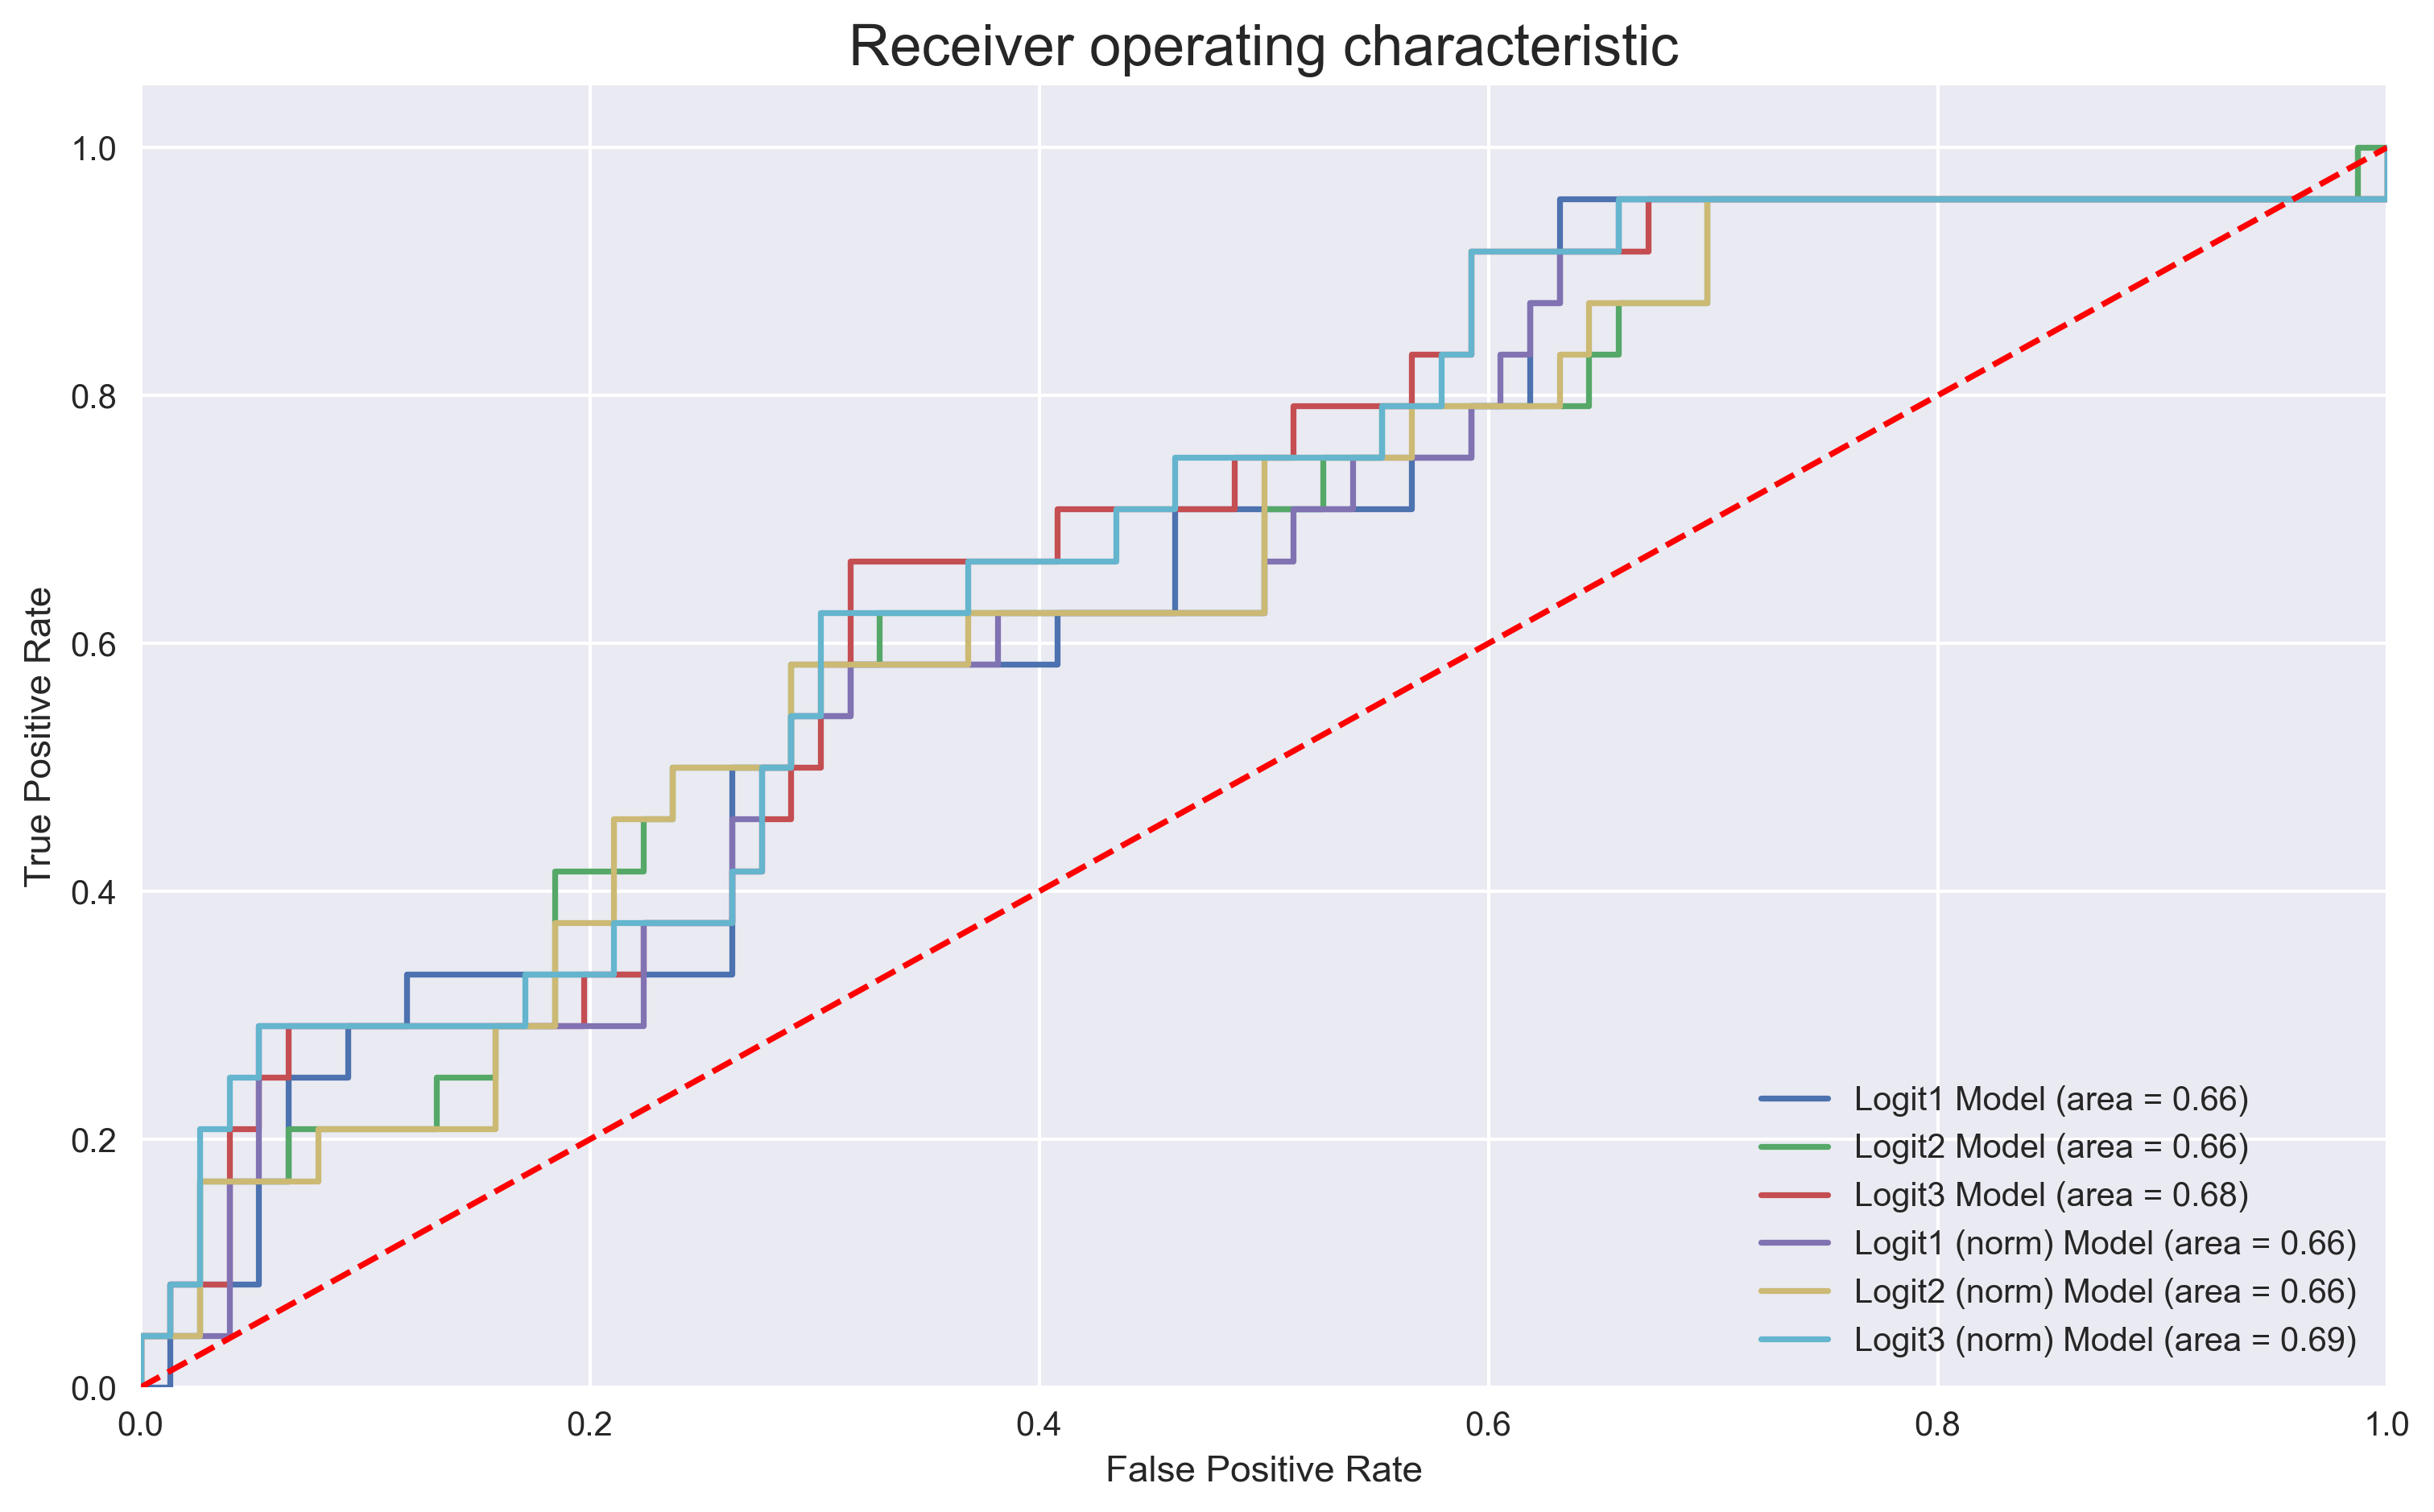

In [16]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 

Y=y_test
logit0_roc_auc = roc_auc_score(Y, y_hat0)
logit1_roc_auc = roc_auc_score(Y, y_hat1)
logit2_roc_auc = roc_auc_score(Y, y_hat2)
logit0_st_roc_auc = roc_auc_score(Y, y_hat0n)
logit1_st_roc_auc = roc_auc_score(Y, y_hat1n)
logit2_st_roc_auc = roc_auc_score(Y, y_hat2n)


fpr0, tpr0, thresholds0 = roc_curve(Y, y_hat0)
fpr1, tpr1, thresholds1 = roc_curve(Y, y_hat1)
fpr2, tpr2, thresholds2 = roc_curve(Y, y_hat2)
fpr0_st, tpr0_st, thresholds0_st = roc_curve(Y, y_hat0n)
fpr1_st, tpr1_st, thresholds1_st = roc_curve(Y, y_hat1n)
fpr2_st, tpr2_st, thresholds2_st = roc_curve(Y, y_hat2n)

#plt.figure()
plt.style.use('seaborn')
plt.figure(figsize=(12, 7), dpi=300)
plt.plot(fpr0, tpr0, label='Logit1 Model (area = %0.2f)' % logit0_roc_auc)
plt.plot(fpr1, tpr1, label='Logit2 Model (area = %0.2f)' % logit1_roc_auc)
plt.plot(fpr2, tpr2, label='Logit3 Model (area = %0.2f)' % logit2_roc_auc)
plt.plot(fpr0_st, tpr0_st, label='Logit1 (norm) Model (area = %0.2f)' % logit0_st_roc_auc)
plt.plot(fpr1_st, tpr1_st, label='Logit2 (norm) Model (area = %0.2f)' % logit1_st_roc_auc)
plt.plot(fpr2_st, tpr2_st, label='Logit3 (norm) Model (area = %0.2f)' % logit2_st_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic', size=17)
plt.legend(loc="lower right")
plt.show()

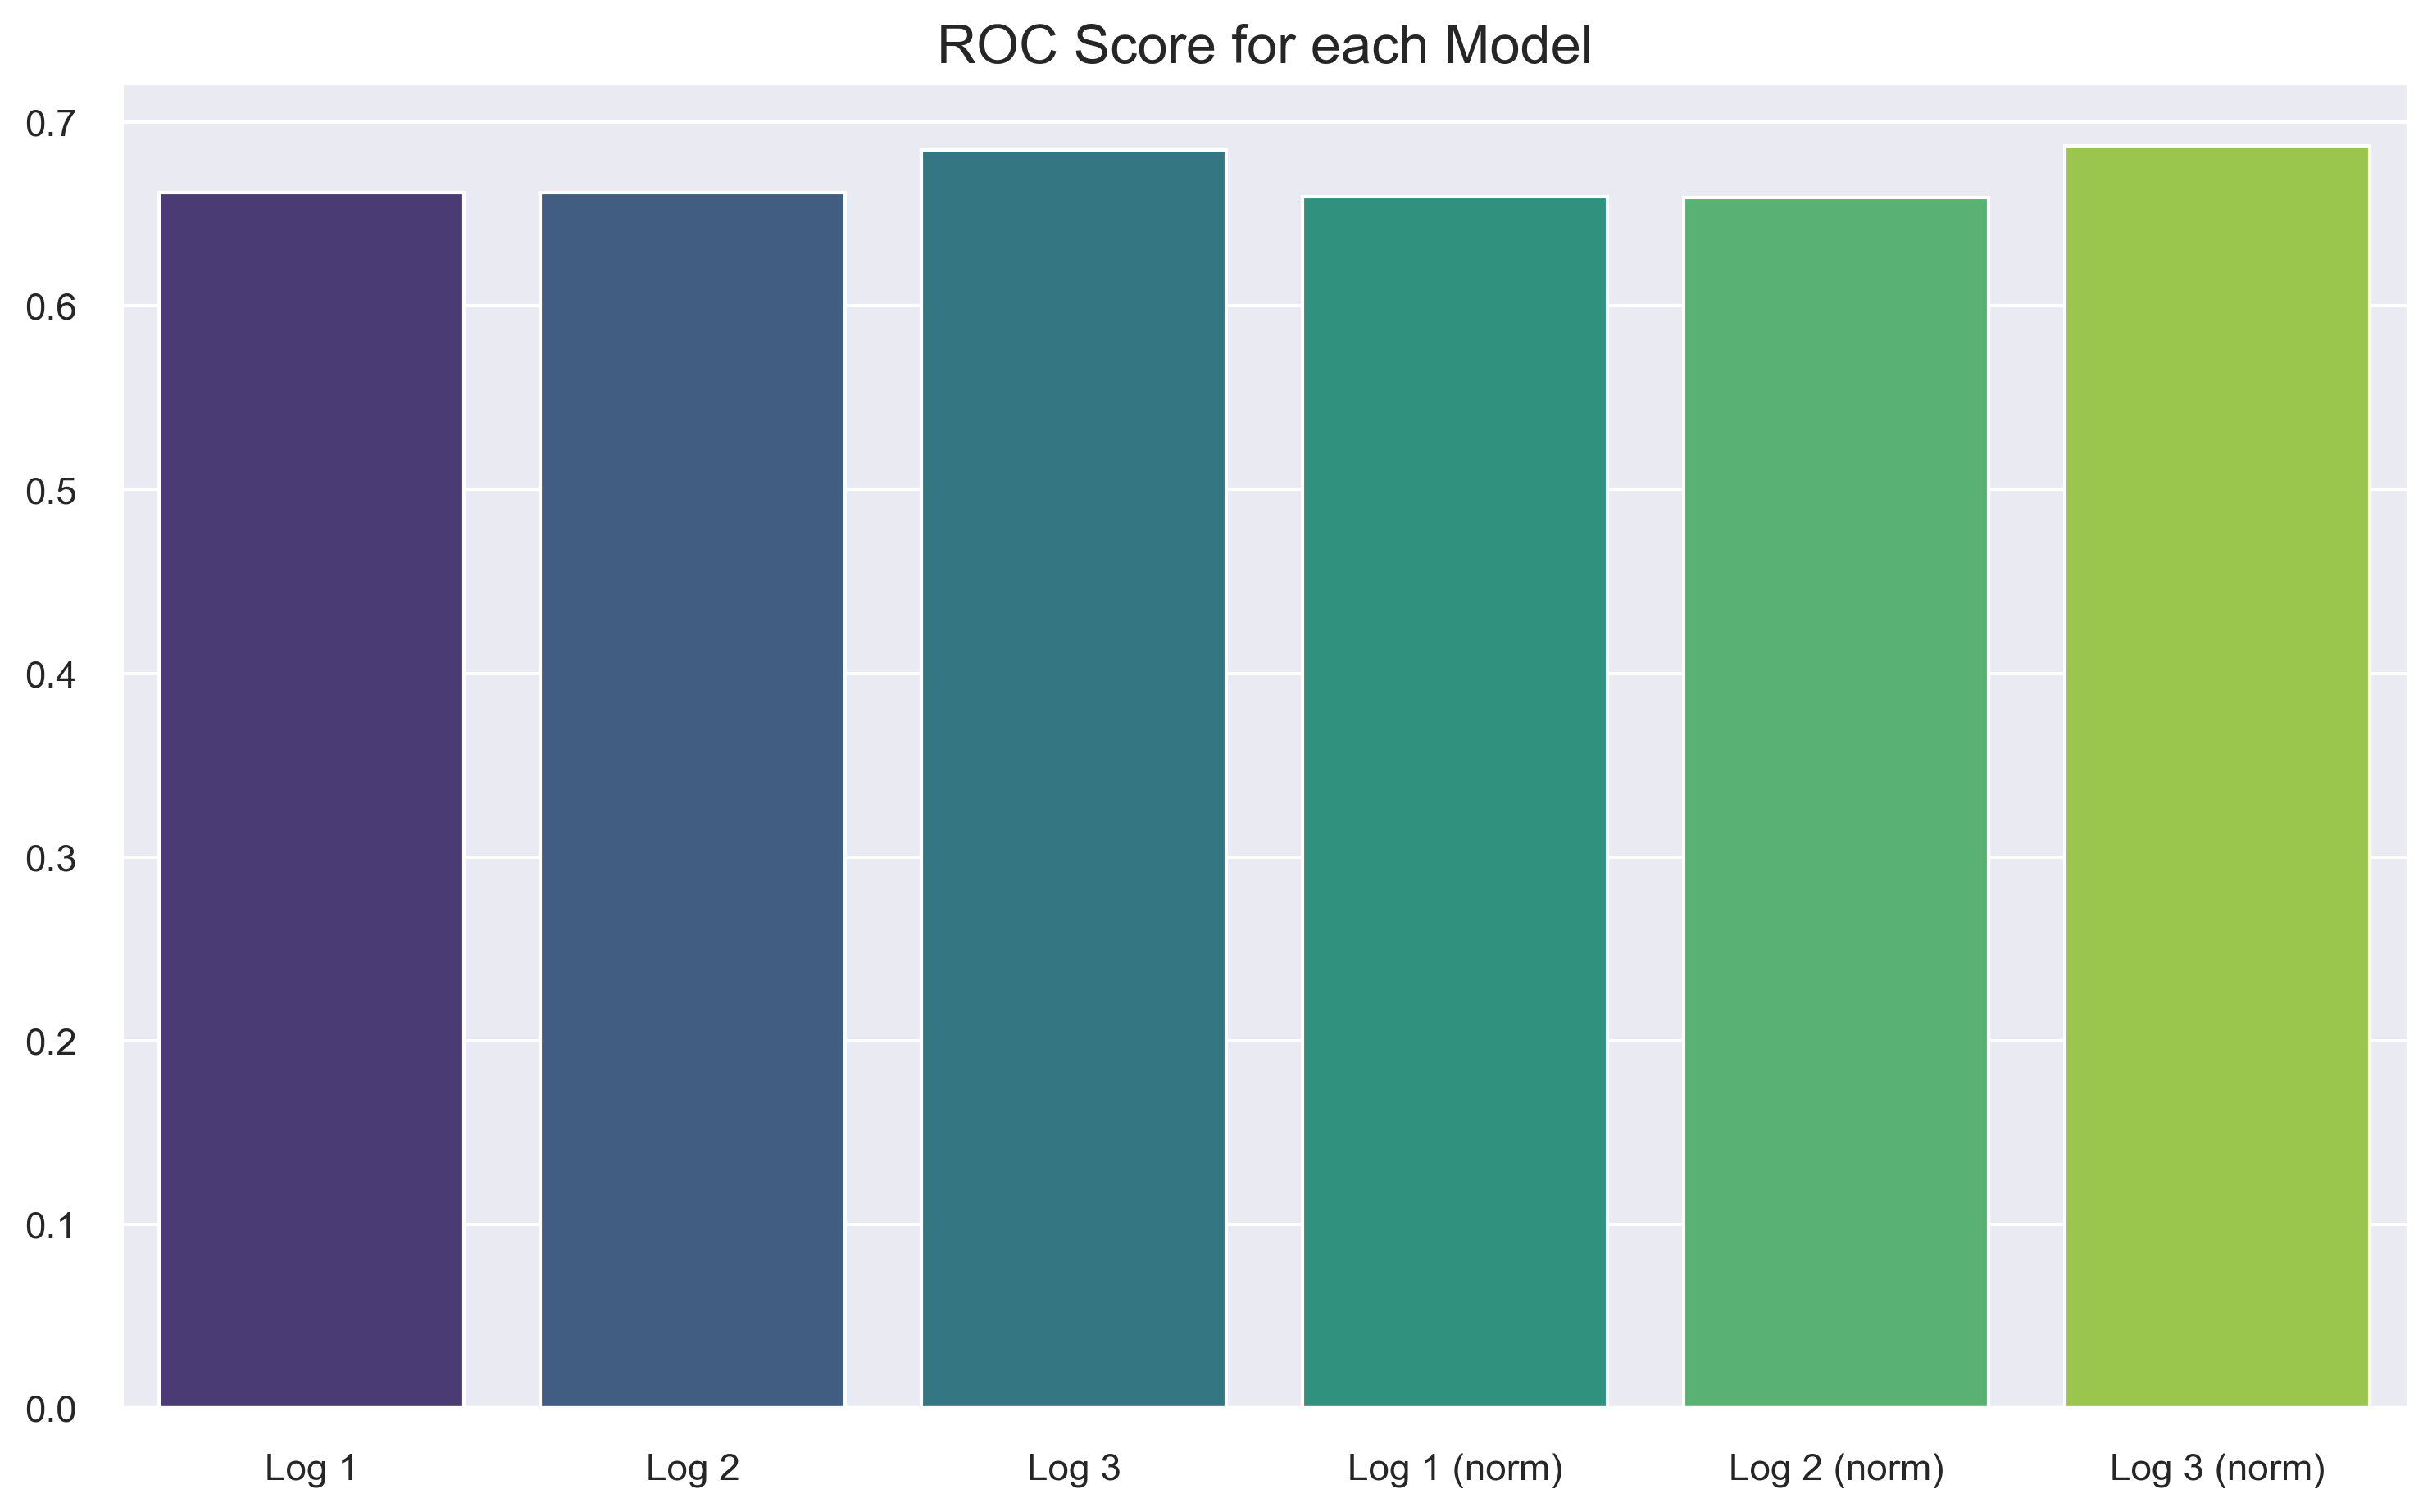

Models Log 2 and Log 2 (norm) have the best ROC Score: 0.66


In [17]:
plt.figure(figsize=(12, 7), dpi=300)
sns.set_theme()
sns.barplot(x=['Log 1', 'Log 2', 'Log 3', 'Log 1 (norm)', 'Log 2 (norm)', 'Log 3 (norm)'],
y=[logit0_roc_auc, logit1_roc_auc, logit2_roc_auc, 
   logit0_st_roc_auc, logit1_st_roc_auc, logit2_st_roc_auc], palette='viridis')
plt.title('ROC Score for each Model', size=16)
plt.show()
print('Models Log 2 and Log 2 (norm) have the best ROC Score:', round(logit1_roc_auc, 2))

#

In [18]:

dicc = {'Model': ['Log 1', 'Log 2', 'Log 3', 'Log 1 (norm)', 'Log 2 (norm)', 'Log 3 (norm)'],
        'Accuracy Score': [a1, a2, a3, a1n, a2n, a3n]}

table = pd.DataFrame(dicc).set_index('Model')
table

,Accuracy Score
Model,
Log 1,0.75
Log 2,0.71
Log 3,0.76
Log 1 (norm),0.71
Log 2 (norm),0.71
Log 3 (norm),0.71


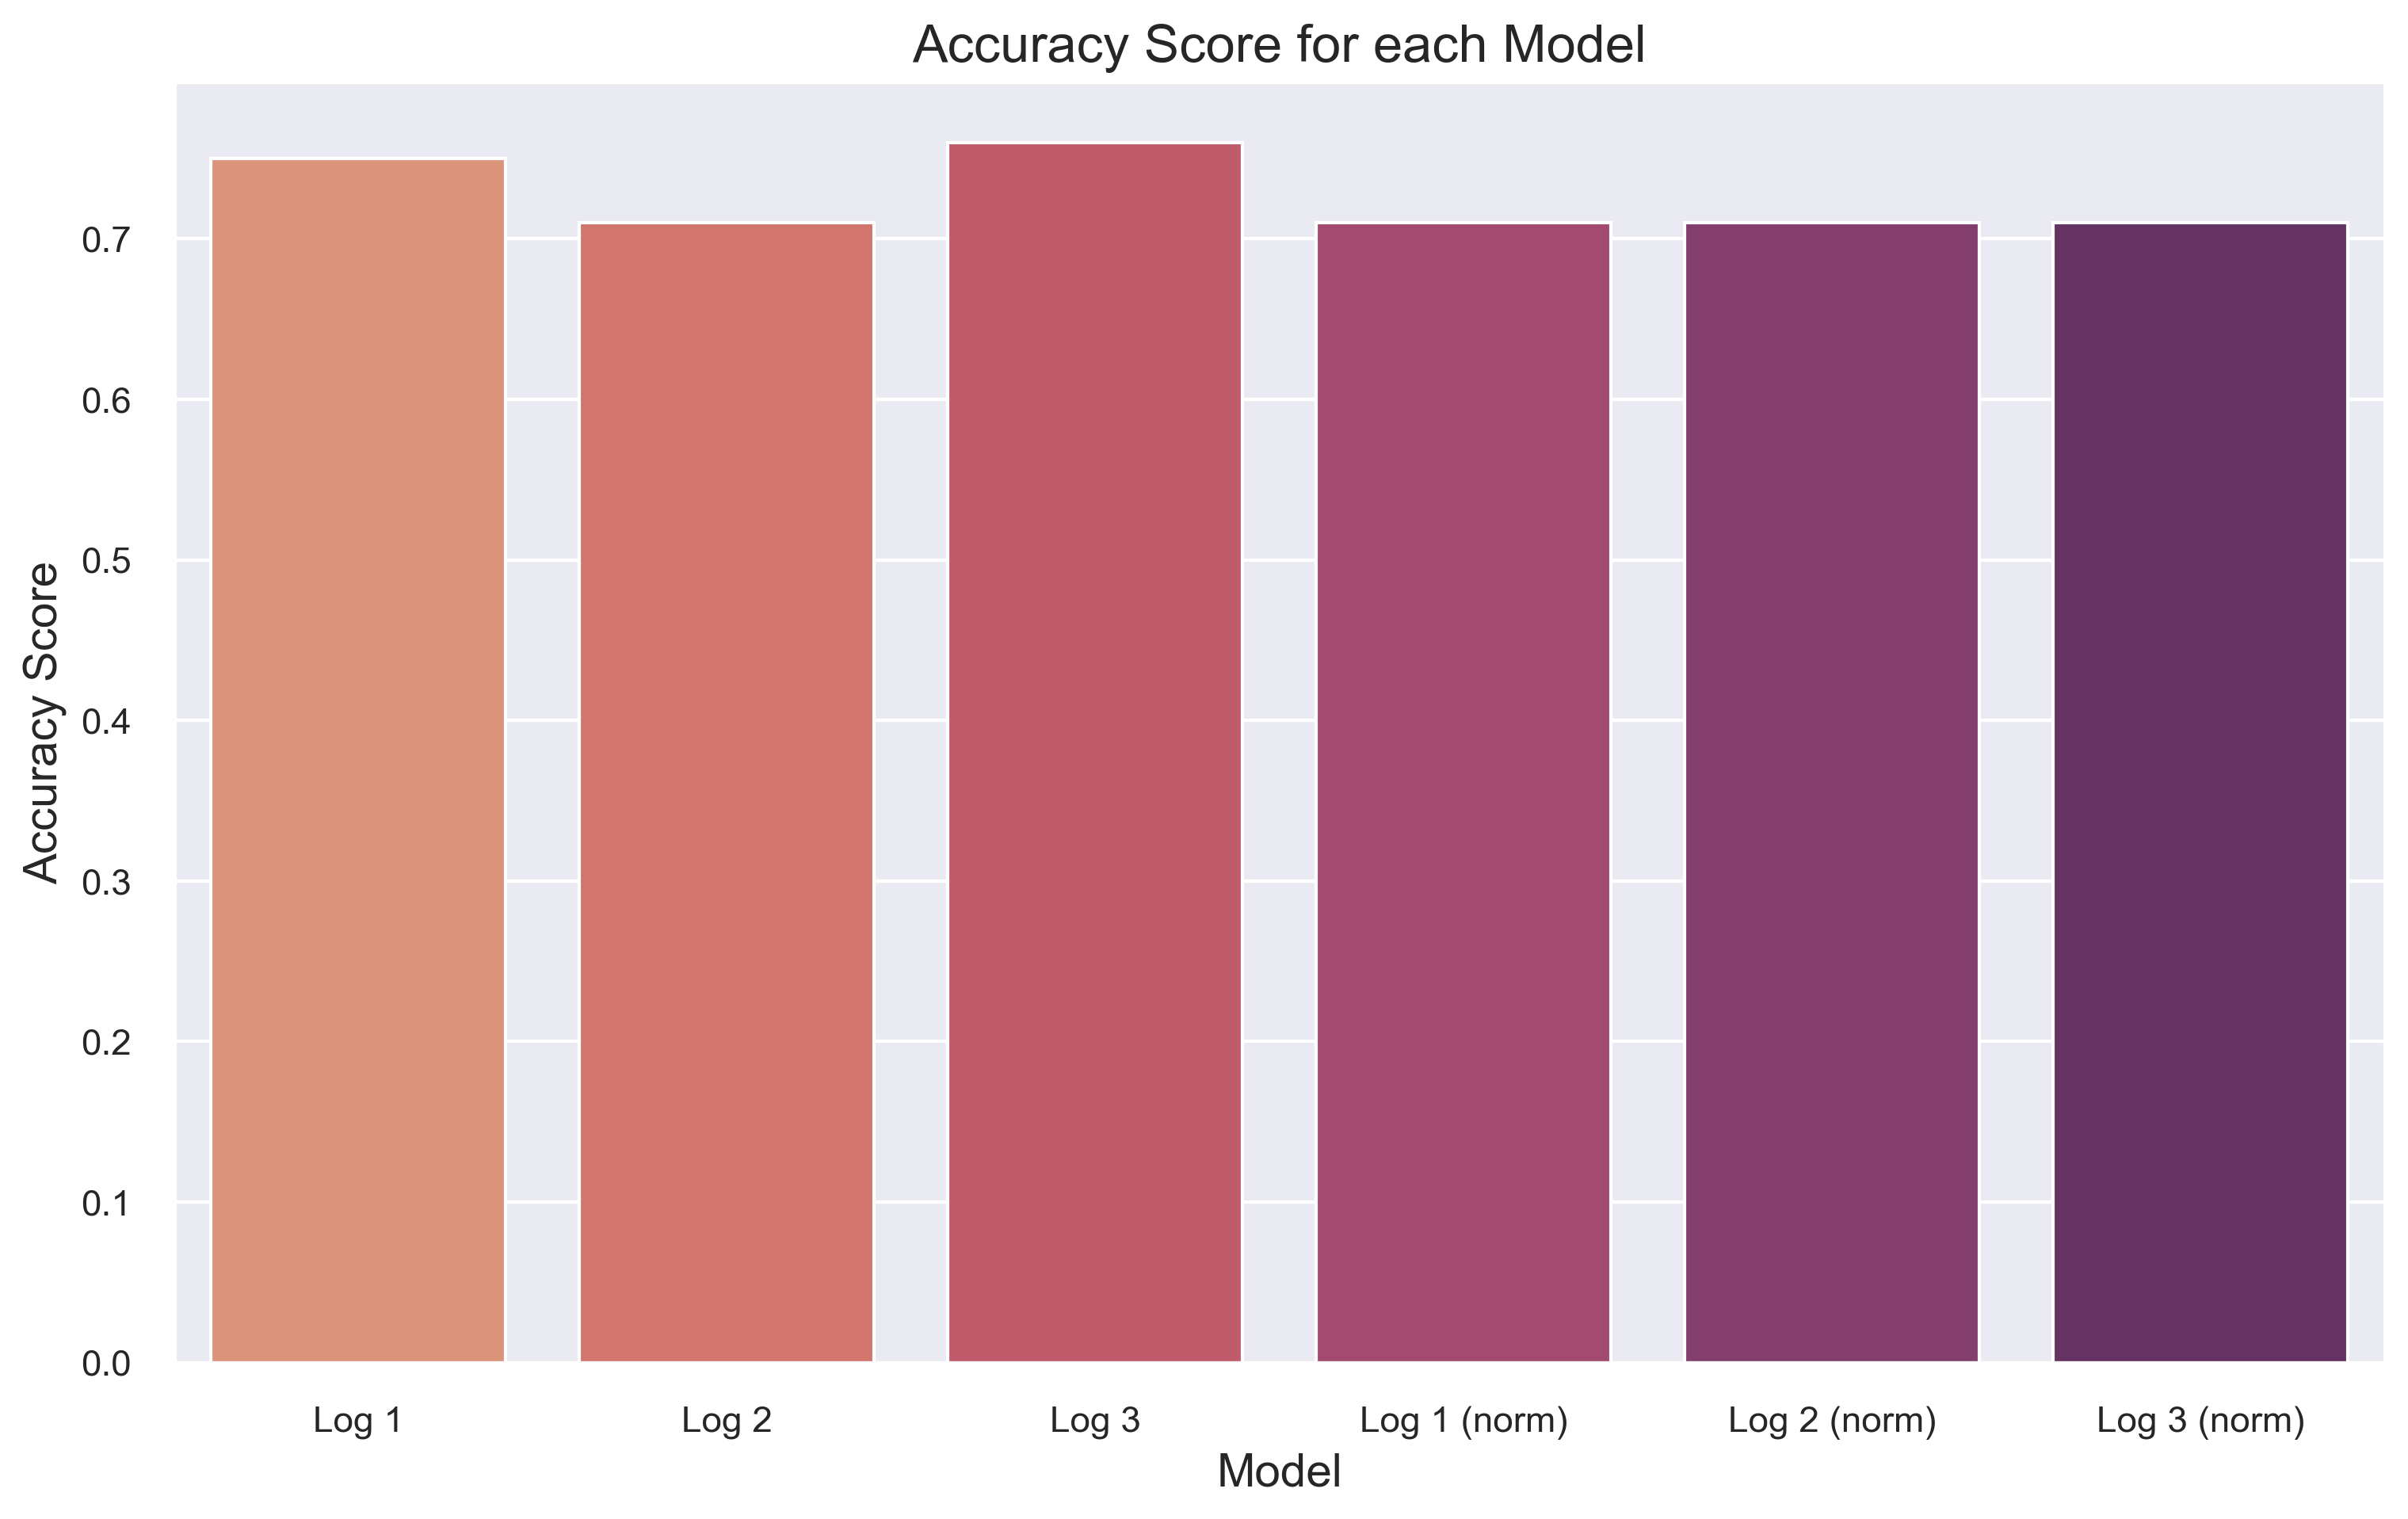

Model Log 3 and Log 3 (norm) have the best Accuracy Score: 0.76


In [19]:
sns.set(rc={'figure.figsize':(12, 7), "figure.dpi":300})
sns.barplot(x=table.index, y='Accuracy Score', data=table, palette='flare')
plt.xlabel('Model', size=14, )
plt.ylabel('Accuracy Score', size=14)
plt.title('Accuracy Score for each Model', size=16)
plt.show()

print('Model Log 3 and Log 3 (norm) have the best Accuracy Score:', table.loc['Log 3', 'Accuracy Score'])